# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head(5)

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

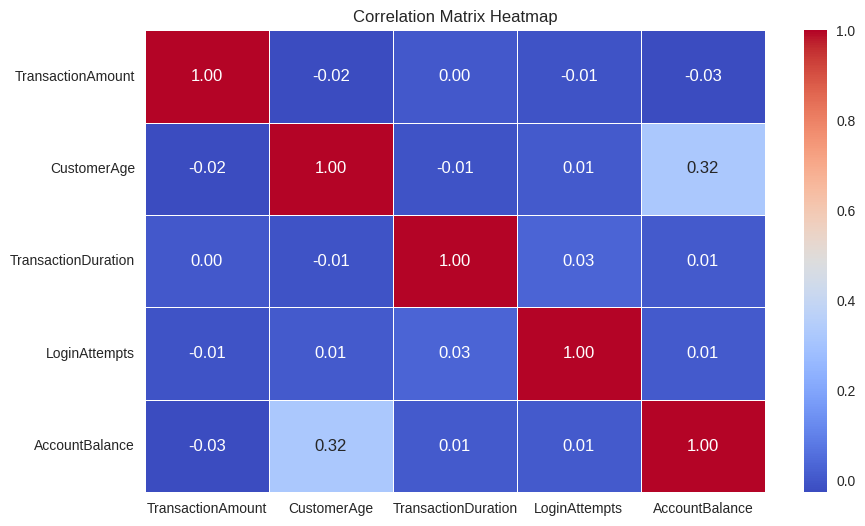

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
def correlation_matrix():
  kolom_numerik = df.select_dtypes(include=np.number)
  corr = kolom_numerik.corr()
  plt.figure(figsize=(10,6))
  sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
  plt.title('Correlation Matrix Heatmap')
  plt.show()

correlation_matrix()

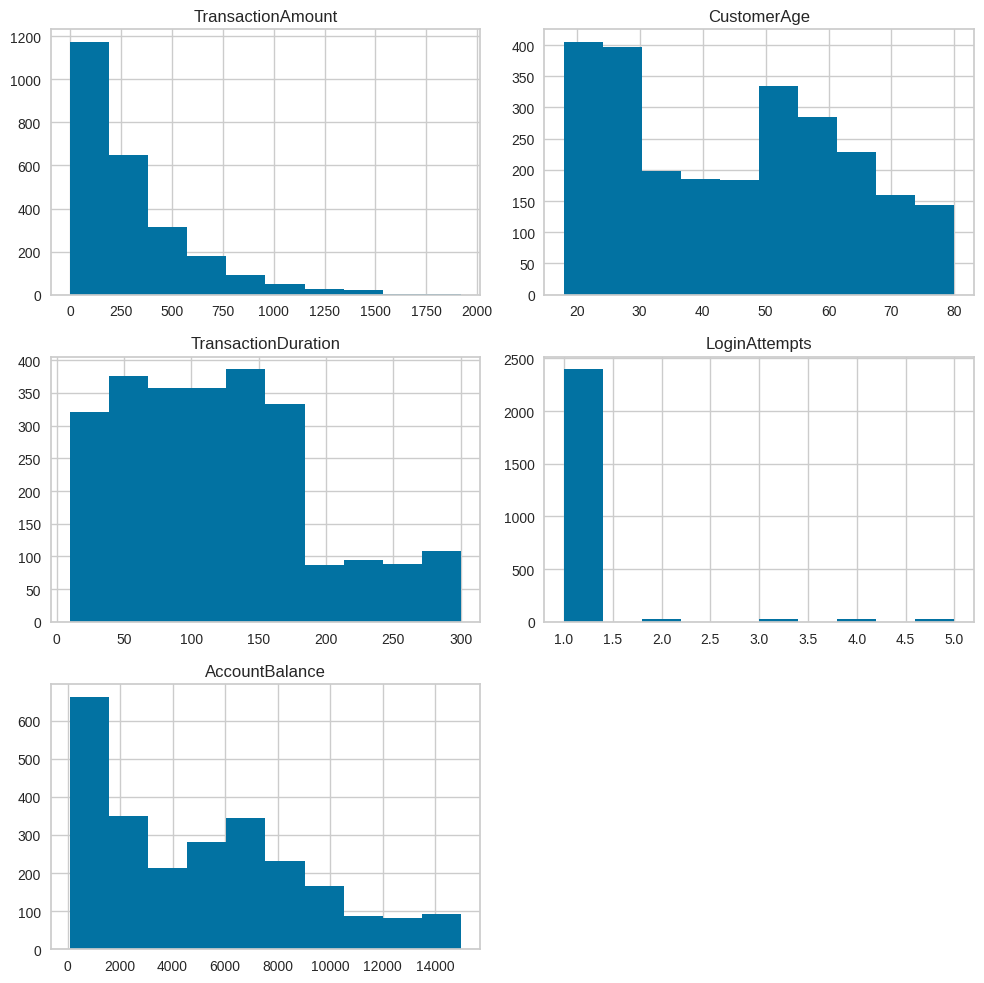

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
def histogram():
  kolom_numerik = df.select_dtypes(include=np.number)
  kolom_numerik.hist(figsize=(10, 10))
  plt.tight_layout()
  plt.show()

histogram()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

/tmp/ipython-input-3455856135.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_amount = df.groupby('AgeGroup')['TransactionAmount'].sum().reset_index()
/tmp/ipython-input-3455856135.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


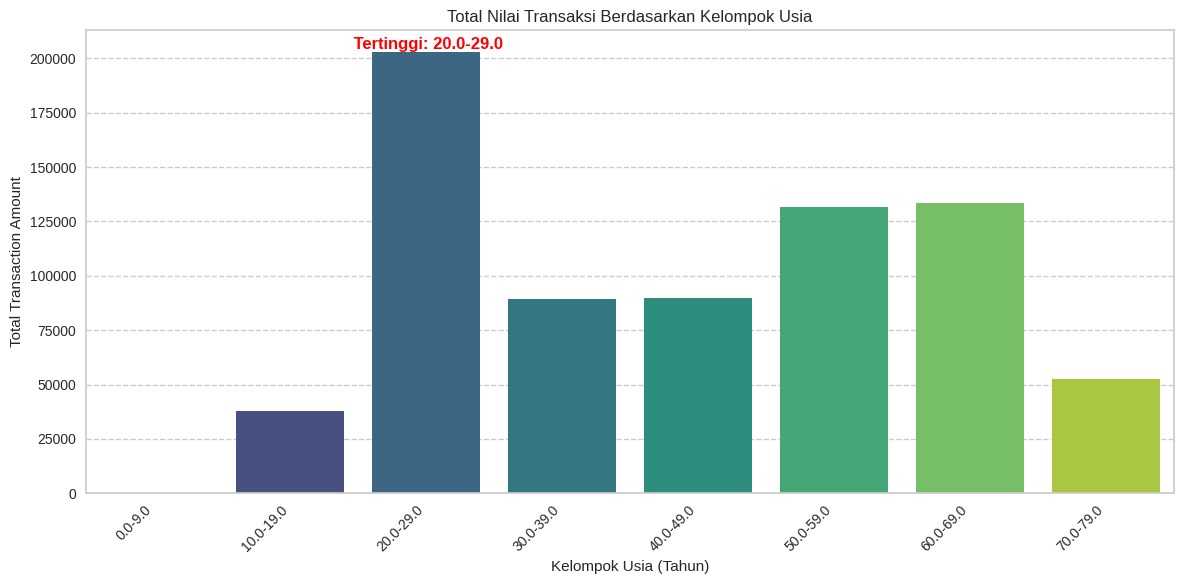

/tmp/ipython-input-3455856135.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_amount = df.groupby('AgeGroup')['TransactionAmount'].mean().reset_index()
/tmp/ipython-input-3455856135.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


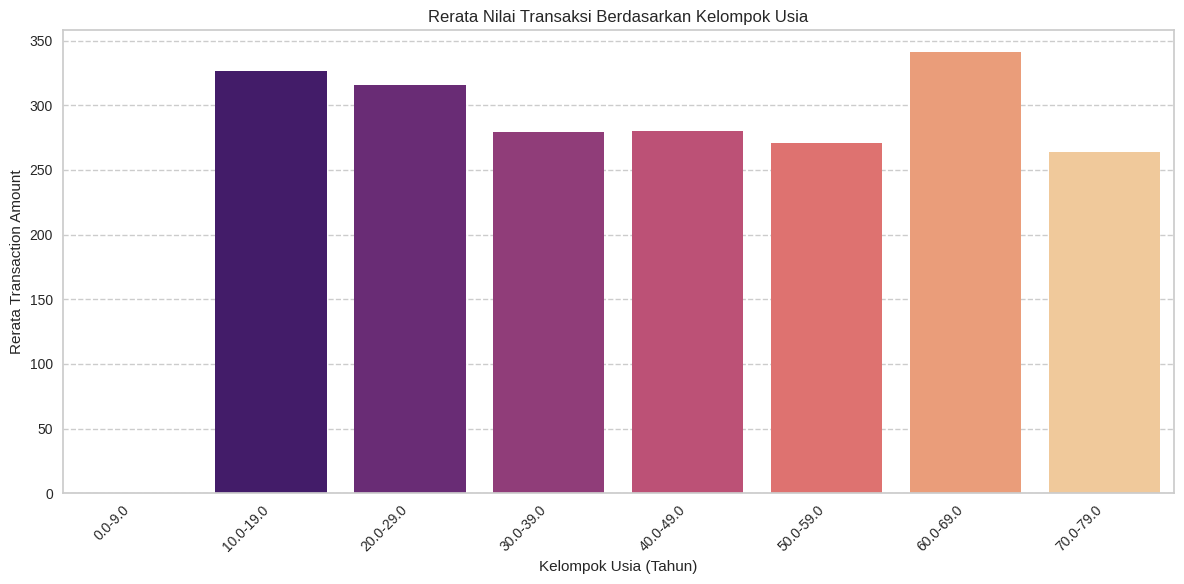

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
def visualisasiTransaksi(df, bin_size = 10):
  max_ages = df['CustomerAge'].max()
  bins = np.arange(0, max_ages + bin_size, bin_size)
  labels = [f'{i}-{i + bin_size - 1}' for i in bins[:-1]]

  df['AgeGroup'] = pd.cut(
        df['CustomerAge'],
        bins=bins,
        labels=labels,
        right=False
  )
  return df

df = visualisasiTransaksi(df, bin_size=10)

def visualisasiPerUmur(df):
    total_amount = df.groupby('AgeGroup')['TransactionAmount'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(
        x='AgeGroup',
        y='TransactionAmount',
        data=total_amount,
        palette='viridis'
    )
    max_group = total_amount.loc[total_amount['TransactionAmount'].idxmax()]
    plt.text(
        max_group.name, # posisi x
        max_group['TransactionAmount'], # posisi y
        f' Tertinggi: {max_group["AgeGroup"]}',
        ha='center',
        va='bottom',
        fontsize=12,
        color='red',
        weight='bold'
    )

    plt.title('Total Nilai Transaksi Berdasarkan Kelompok Usia')
    plt.xlabel('Kelompok Usia (Tahun)')
    plt.ylabel('Total Transaction Amount')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

visualisasiPerUmur(df.copy())

def visualisasiRerataPerUmur(df):
    average_amount = df.groupby('AgeGroup')['TransactionAmount'].mean().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(
        x='AgeGroup',
        y='TransactionAmount',
        data=average_amount,
        palette='magma'
    )

    plt.title('Rerata Nilai Transaksi Berdasarkan Kelompok Usia')
    plt.xlabel('Kelompok Usia (Tahun)')
    plt.ylabel('Rerata Transaction Amount')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

visualisasiRerataPerUmur(df.copy())

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [10]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
def feature_scaling():
  kolom_numerik = df.select_dtypes(include=np.number)
  scaler = MinMaxScaler()
  df[kolom_numerik.columns] = scaler.fit_transform(kolom_numerik)
  return df.head()

feature_scaling()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,AgeGroup
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08,70.0-79.0
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35,60.0-69.0
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04,10.0-19.0
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06,20.0-29.0
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39,NaN


In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate', 'TransactionDate'])
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup
0,0.007207,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,70.0-79.0
1,0.195940,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,60.0-69.0
2,0.065680,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,10.0-19.0
3,0.096016,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,20.0-29.0
4,0.006874,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,NaN


In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
kolom_kategorikal = df[['TransactionType', 'Location', 'Channel', 'CustomerOccupation']]
encoder = LabelEncoder()
for kolom in kolom_kategorikal:
    df[kolom] = encoder.fit_transform(df[kolom].astype(str))
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832,70.0-79.0
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055,60.0-69.0
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637,10.0-19.0
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198,20.0-29.0
4,0.006874,0,1,2,NaN,3,0.648276,0.0,0.492591,NaN


In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'AgeGroup']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna()

In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
def checkOutlier(df):
  kolom_numerik = df.select_dtypes(include=np.number)
  Q1 = kolom_numerik.quantile(0.25)
  Q3 = kolom_numerik.quantile(0.75)
  IQR = Q3 - Q1
  outliers = ((kolom_numerik < (Q1 - 1.5 * IQR)) | (kolom_numerik > (Q3 + 1.5 * IQR))).any(axis=1)
  return outliers.sum()

checkOutlier(df)

np.int64(729)

In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

#Binning untuk 'AccountBalance'
bins_amount = [0, 0.33, 0.66, 1.0]
labels_amount = ['Rendah', 'Sedang', 'Tinggi']

df['Balance_Binned'] = pd.cut(
    df['AccountBalance'],
    bins=bins_amount,
    labels=labels_amount,
    right=True,
    include_lowest=True
).astype(str)

#Binning untuk 'CustomerAge'
bins_age = [0.0, 0.3, 0.65, 1.0]
labels_age = ['Muda', 'Dewasa', 'Tua']

df['Age_Binned'] = pd.cut(
    df['CustomerAge'],
    bins=bins_age,
    labels=labels_age,
    right=True,
    include_lowest=True
).astype(str)

encoder = LabelEncoder()
kolom_binning = ['Balance_Binned', 'Age_Binned']
for kolom in kolom_binning:
    df[kolom] = encoder.fit_transform(df[kolom])

print(df[['AccountBalance', 'Balance_Binned', 'CustomerAge', 'Age_Binned']].head())

   AccountBalance  Balance_Binned  CustomerAge  Age_Binned
0        0.336832               1     0.838710           2
1        0.918055               2     0.806452           2
2        0.068637               0     0.016129           1
3        0.569198               1     0.129032           1
5        0.045738               0     0.000000           1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Balance_Binned,Age_Binned
count,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000
mean,0.154887,0.788235,21.375630,1.014286,0.425366,1.527311,0.377806,0.029307,0.335578,0.600840,0.913445
std,0.152047,0.438419,12.411844,0.831169,0.284623,1.156015,0.242011,0.144819,0.262997,0.693087,0.768815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042538,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.092878,0.000000,0.000000
50%,0.110577,1.000000,21.000000,1.000000,0.435484,1.500000,0.351724,0.000000,0.308010,0.000000,1.000000
75%,0.214307,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.000000,0.509357,1.000000,2.000000
max,1.000000,2.000000,43.000000,3.000000,0.983871,4.000000,1.000000,1.000000,1.000000,2.000000,2.000000


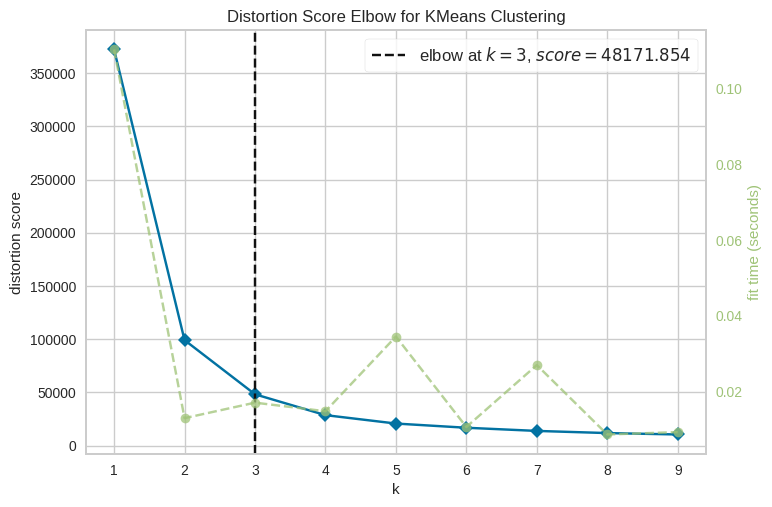

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
fitur_clustering = [
    'TransactionAmount', 'CustomerAge', 'TransactionDuration',
    'LoginAttempts', 'AccountBalance',
    'TransactionType', 'Location', 'Channel', 'CustomerOccupation'
]

# Pisahkan fitur ke variabel X
X = df[fitur_clustering]

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(X)

visualizer.show()

In [21]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X)

df['Cluster'] = kmeans.labels_

print("Data dengan Hasil Clustering:")
print(df.head())

Data dengan Hasil Clustering:
   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0           0.007207                1        36        0     0.838710   
1           0.195940                1        15        0     0.806452   
2           0.065680                1        23        2     0.016129   
3           0.096016                1        33        2     0.129032   
5           0.047888                1        28        0     0.000000   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0             0.244828            0.0        0.336832   
1                   0             0.451724            0.0        0.918055   
2                   3             0.158621            0.0        0.068637   
3                   3             0.051724            0.0        0.569198   
5                   3             0.558621            0.0        0.045738   

    AgeGroup  Balance_Binned  Age_Binned  Cluster  
0  70.0-79.0    

Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans, "model_clustering.h5")
print("\nModel K-Means telah disimpan sebagai 'model_clustering.h5'")


Model K-Means telah disimpan sebagai 'model_clustering.h5'


(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
score = silhouette_score(X, df['Cluster'])
print(f"Nilai Silhouette Score: {score:.4f}")

Nilai Silhouette Score: 0.5422


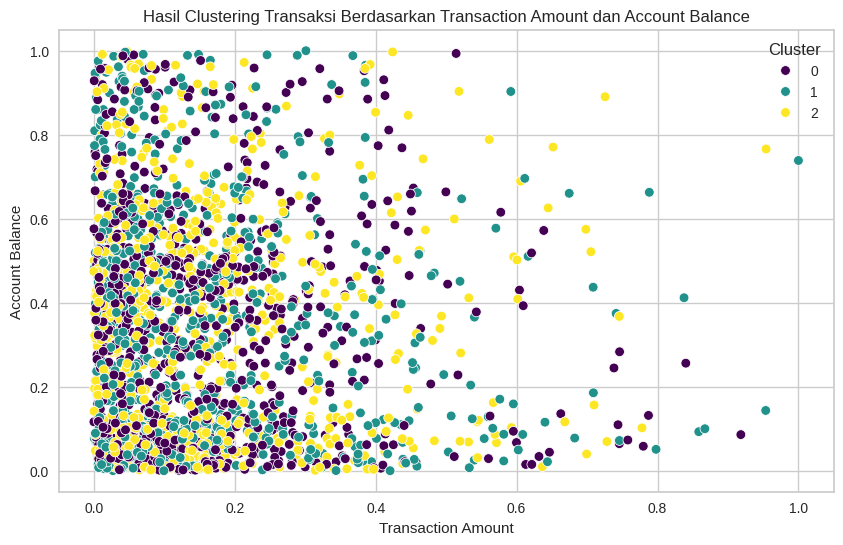

In [24]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TransactionAmount', y='AccountBalance', hue='Cluster', data=df, palette='viridis')
plt.title('Hasil Clustering Transaksi Berdasarkan Transaction Amount dan Account Balance')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

Data setelah transformasi PCA:


,PCA1,PCA2,Cluster
0,14.624560,-1.534349,1
1,-6.375491,-1.632280,0
2,1.623849,1.529700,0
3,11.623778,1.449195,1
4,6.622914,1.536382,0


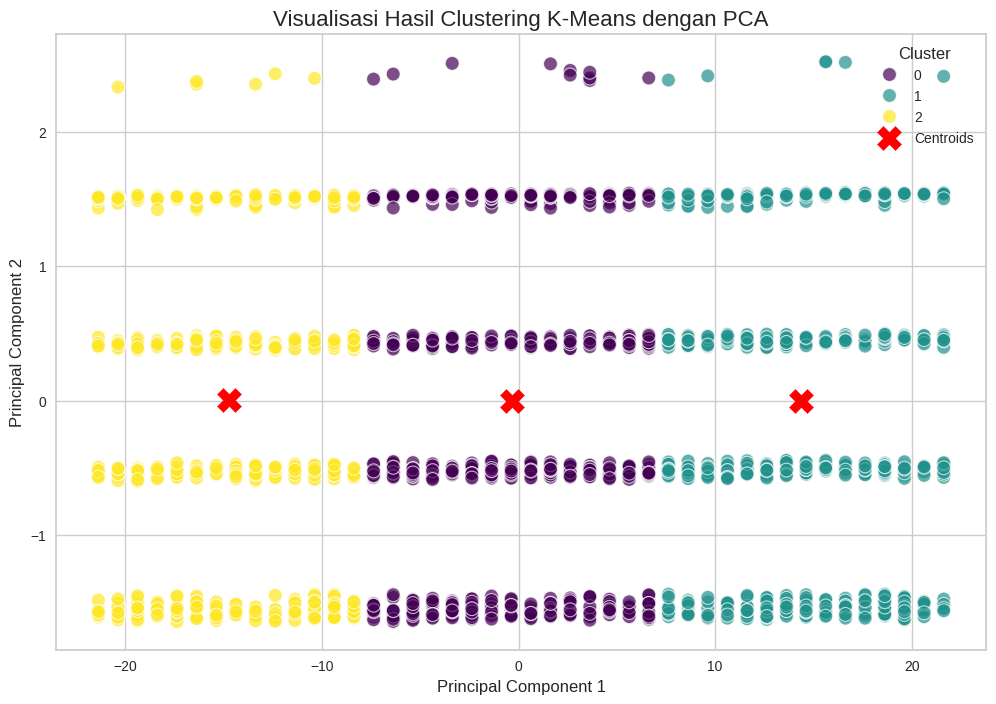

In [25]:
# Membangun model menggunakan PCA.
pca=PCA(n_components=2)
X_pca = pca.fit_transform(X)
data_final_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

data_final_pca['Cluster'] = df['Cluster'].values
kmeans_pca = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_pca.fit(data_final_pca[['PCA1', 'PCA2']])

print("Data setelah transformasi PCA:")
display(data_final_pca.head())

centroids = kmeans_pca.cluster_centers_

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    data=data_final_pca,
    palette='viridis',
    alpha=0.7,
    s=100
)

plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=300,
    c='red',
    marker='X',
    label='Centroids'
)

plt.title('Visualisasi Hasil Clustering K-Means dengan PCA', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")
print("\nModel K-Means dengan PCA telah disimpan sebagai 'PCA_model_clustering.h5'")


Model K-Means dengan PCA telah disimpan sebagai 'PCA_model_clustering.h5'


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

#Contoh 2 fitur untuk dianalisa TransactionAmount dan CustomerAge
numerical_cols = ['TransactionAmount', 'CustomerAge']

agg_functions = {col: ['mean', 'min', 'max', 'median'] for col in numerical_cols}
cluster_analysis = df.groupby('Cluster').agg(agg_functions)

print("Analisis Deskriptif per Cluster:")
display(cluster_analysis.T)

Analisis Deskriptif per Cluster:


Cluster                          0         1         2
TransactionAmount mean    0.151581  0.158590  0.154739
                  min     0.000000  0.000599  0.000031
                  max     0.918269  1.000000  0.954092
                  median  0.110300  0.106340  0.111979
CustomerAge       mean    0.435236  0.412419  0.427797
                  min     0.000000  0.000000  0.000000
                  max     0.983871  0.983871  0.983871
                  median  0.451613  0.387097  0.419355

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1.
**Cluster 0: (TransactionAmount - Menengah)**:
  - **Rata-rata (mean) <Fitur>:** 0.151581 ($295.72)
  - **Analisis:** Cluster ini mewakili kelompok nasabah dengan nilai transaksi rata-rata yang solid. Mereka kemungkinan besar adalah segmen nasabah reguler dan aktif yang menjadi tulang punggung volume transaksi harian. <br>

**Cluster 1: (TransactionAmount - Rendah)**:
  - **Rata-rata (mean) <Fitur>:** 0.158590 ($289.91)
  - **Analisis:** Cluster ini memiliki rata-rata nilai transaksi paling rendah. Kelompok ini bisa jadi adalah nasabah yang lebih sering melakukan transaksi kecil, nasabah yang kurang aktif, atau nasabah baru yang baru mulai bertransaksi. <br>

**Cluster 2: (TransactionAmount - Tinggi)**:
  - **Rata-rata (mean) <Fitur>:** 0.154739 ($304.73)
  - **Analisis:** Cluster ini menonjol karena memiliki rata-rata nilai transaksi paling tinggi. Kelompok ini dapat dianggap sebagai nasabah bernilai tinggi (high-value customers) atau nasabah premium yang sering melakukan pembelian dalam jumlah besar. <br>

2.
**Cluster 0: (CustomerAge)**:
  - **Rata-rata (mean) <Fitur>:** 0.435236 (~46 Tahun)
  - **Analisis:** Cluster ini mewakili kelompok nasabah dengan usia rata-rata tertinggi. Mereka adalah segmen nasabah yang mapan dan berada dalam puncak usia produktif.  <br>

**Cluster 1: (CustomerAge)**:
  - **Rata-rata (mean) <Fitur>:** 0.412419 (~45 Tahun
  - **Analisis:** Cluster ini memiliki profil usia yang sangat mirip dengan Cluster 0 mereka juga termasuk dalam kategori nasabah paruh baya yang matang.  <br>

**Cluster 2: (CustomerAge )**:
  - **Rata-rata (mean) <Fitur>:** 0.427797 (~42 Tahun)
  - **Analisis:** Cluster ini Cluster ini memiliki rata-rata usia yang sedikit lebih muda dibandingkan dua cluster lainnya.
  

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df.rename(columns={'Cluster': 'Target'}, inplace=True)
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Balance_Binned,Age_Binned,Target
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832,70.0-79.0,1,2,1
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055,60.0-69.0,2,2,0
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637,10.0-19.0,0,1,0
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198,20.0-29.0,1,1,1
5,0.047888,1,28,0,0.000000,3,0.558621,0.0,0.045738,10.0-19.0,0,1,0


In [29]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2380 entries, 0 to 2524
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   TransactionAmount    2380 non-null   float64 
 1   TransactionType      2380 non-null   int64   
 2   Location             2380 non-null   int64   
 3   Channel              2380 non-null   int64   
 4   CustomerAge          2380 non-null   float64 
 5   CustomerOccupation   2380 non-null   int64   
 6   TransactionDuration  2380 non-null   float64 
 7   LoginAttempts        2380 non-null   float64 
 8   AccountBalance       2380 non-null   float64 
 9   AgeGroup             2380 non-null   category
 10  Balance_Binned       2380 non-null   int64   
 11  Age_Binned           2380 non-null   int64   
 12  Target               2380 non-null   int32   
dtypes: category(1), float64(5), int32(1), int64(6)
memory usage: 235.1 KB


In [31]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse

url_asli = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df_asli = pd.read_csv(url_asli)

kolom_numerik = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
kolom_kategorikal = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

scaler = MinMaxScaler()
scaler.fit(df_asli[kolom_numerik].dropna())

encoders = {}
for kolom in kolom_kategorikal:
    encoder = LabelEncoder()
    encoder.fit(df_asli[kolom].astype(str))
    encoders[kolom] = encoder

df_inverse = df.copy()

df_inverse[kolom_numerik] = scaler.inverse_transform(df_inverse[kolom_numerik])

print("Dataset setelah kolom numerik di-inverse:")
display(df_inverse.head())

Dataset setelah kolom numerik di-inverse:


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Balance_Binned,Age_Binned,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,70.0-79.0,1,2,1
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,60.0-69.0,2,2,0
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,10.0-19.0,0,1,0
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,20.0-29.0,1,1,1
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68,10.0-19.0,0,1,0


In [32]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# tampilkan dataset yang sudah di-inverse

for kolom in kolom_kategorikal:
    le = encoders[kolom]
    df_inverse[kolom] = le.inverse_transform(df_inverse[kolom].astype(int))

print("Dataset setelah kolom numerik DAN kategorikal di-inverse:")
display(df_inverse.head())

Dataset setelah kolom numerik DAN kategorikal di-inverse:


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Balance_Binned,Age_Binned,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,70.0-79.0,1,2,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,60.0-69.0,2,2,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,10.0-19.0,0,1,0
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,20.0-29.0,1,1,1
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,10.0-19.0,0,1,0


In [33]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

if 'Target' not in df_inverse.columns:
    df_inverse['Target'] = df['Target']

# Buat fungsi agregasi
fungsi_agregasi = {kol: ['mean', 'min', 'max', 'median'] for kol in kolom_numerik}
fungsi_agregasi.update({kol: (lambda x: x.mode()[0]) for kol in kolom_kategorikal})

# Lakukan groupby dan agregasi
analisis_cluster_asli = df_inverse.groupby('Target').agg(fungsi_agregasi)

# Tampilkan hasil Task 3
print("Analisis Deskriptif per Cluster (Nilai Asli):")
display(analisis_cluster_asli.T)

Analisis Deskriptif per Cluster (Nilai Asli):


Target                                    0            1            2
TransactionAmount   mean         291.121688   304.570076   297.181031
                    min                0.26         1.41         0.32
                    max             1762.28      1919.11      1831.02
                    median           211.91       204.31       215.13
CustomerAge         mean          44.984652    43.569975    44.523427
                    min                18.0         18.0         18.0
                    max                79.0         79.0         79.0
                    median             46.0         42.0         44.0
TransactionDuration mean         120.855962   118.124682   119.613119
                    min                10.0         10.0         10.0
                    max               300.0        296.0        300.0
                    median            114.0        111.0        111.0
LoginAttempts       mean           1.138135     1.089059     1.123159
                    min                 1.0          1.0          1.0
                    max                 5.0          5.0          5.0
                    median              1.0          1.0          1.0
AccountBalance      mean        5056.017851  5105.386667  5123.685944
                    min              112.76       101.25       117.98
                    max            14881.77     14977.99     14942.78
                    median          4704.91      4518.32      4894.25
TransactionType     <lambda>          Debit        Debit        Debit
Location            <lambda>  Oklahoma City       Tucson    Charlotte
Channel             <lambda>         Branch       Branch       Branch
CustomerOccupation  <lambda>       Engineer      Student      Student

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [34]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Balance_Binned,Age_Binned,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,70.0-79.0,1,2,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,60.0-69.0,2,2,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,10.0-19.0,0,1,0
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,20.0-29.0,1,1,1
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,10.0-19.0,0,1,0


In [35]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.